In [59]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt  

In [60]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

In [61]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [62]:
X = data.drop([ 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal'], axis=1)

In [63]:
X.head()


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [65]:
X.describe()


,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [66]:
X.isnull().sum()

MedInc       0
Latitude     0
Longitude    0
dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [68]:
from sklearn.cluster import KMeans

model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsup.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [69]:
kmeans = KMeans(n_clusters=6, random_state=42)  

# Fit the model  
kmeans.fit(data)  

# Predict clusters  
clusters = kmeans.predict(data)  
clusters

array([0, 1, 0, ..., 0, 0, 2], shape=(20640,), dtype=int32)

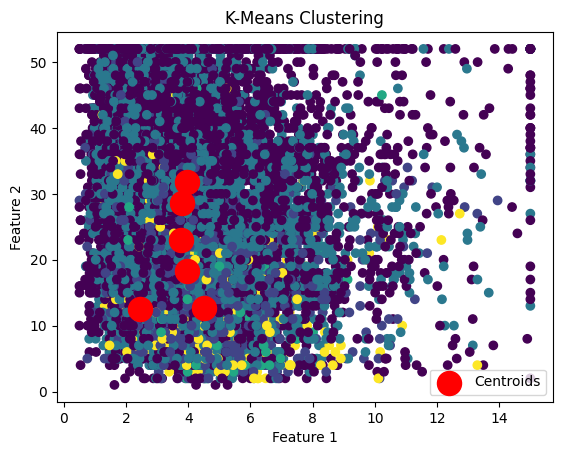

In [70]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')  
plt.title('K-Means Clustering')  
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')  
plt.legend()  
plt.show()  

In [71]:
print(X_train.columns)

Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')


In [72]:
X_train['cluster'] = clusters[:len(X_train)] 

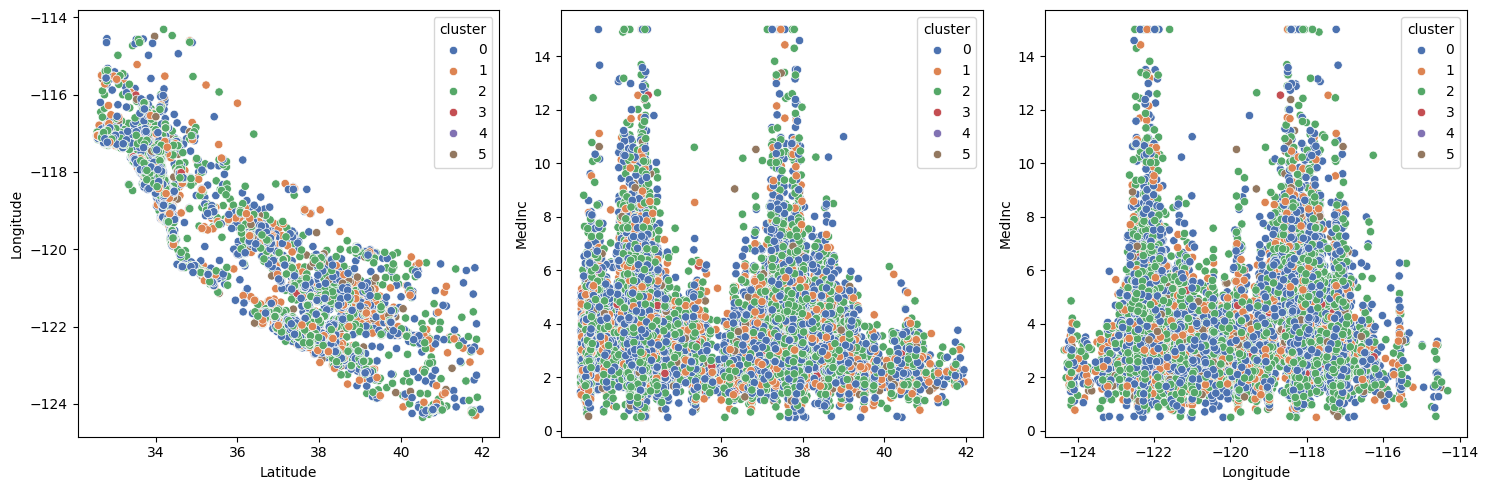

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [74]:
X, _ = make_blobs(n_samples = 300, centers = 3, random_state = 42)

# Training the model
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X)
# Making predictions with new data
new_data = np.array([[2, 3], [0, 4], [3, 1]])
predictions = model.predict(new_data)
predictions

array([2, 2, 2], dtype=int32)

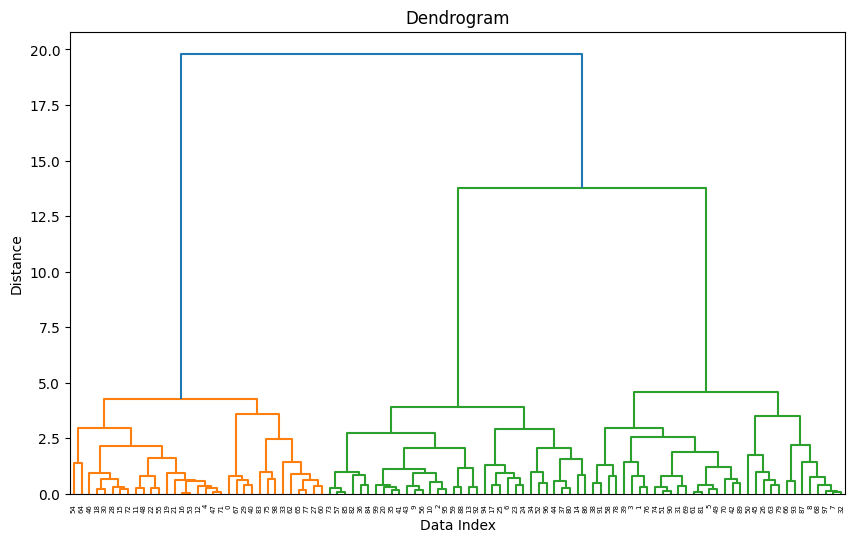

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate a sample dataset
X, _ = make_blobs(n_samples = 100, centers = 3, random_state = 42)

# Calculate the similarity matrix between clusters
Z = linkage(X, method = "complete")

# Display the dendrogram
plt.figure(figsize = (10, 6))

dendrogram(Z)

plt.title("Dendrogram")
plt.xlabel("Data Index")
plt.ylabel("Distance")
plt.show()

In [76]:

from sklearn.decomposition import PCA

# Load the Iris dataset

X = data.drop('MedInc', axis=1)
y = data['MedInc']

# Create a PCA object and fit it to the data
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [77]:
pca

PCA(n_components=2)

In [78]:
X_pca

array([[-1103.51274579,     8.67959036],
       [  975.54117008,    -4.56903522],
       [ -929.54997184,    20.11872854],
       ...,
       [ -418.43752891,   -12.96429466],
       [ -684.43947823,   -12.8480236 ],
       [  -38.43620581,   -12.71295847]], shape=(20640, 2))

In [79]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [80]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [81]:
from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

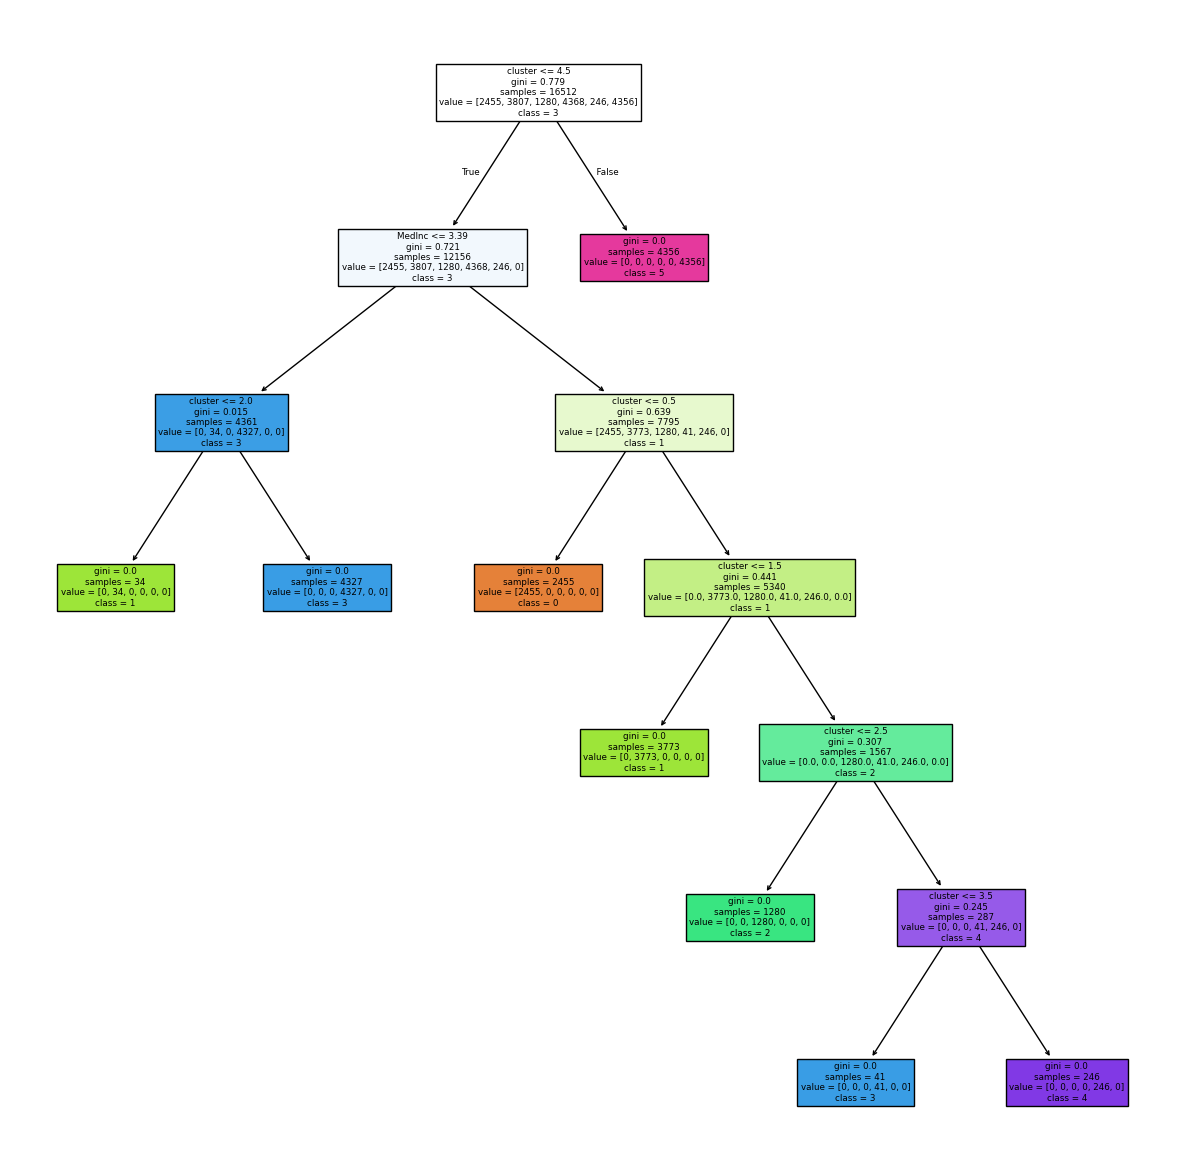

In [82]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [83]:
from pickle import dump

dump(model_unsup, open("./models/k-means_default_42.sav", "wb"))
dump(model_sup, open("./models/decision_tree_classifier_default_42.sav", "wb"))